## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) y [Daniel Suaza](https://Azaus123.github.io/)
## Cod. 202321287  
# Quiz 1


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, acos, asin,  latex, atan2, pprint, init_printing, Derivative, sqrt, rad, sin, cos
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

In [2]:
# Para la animación
# pip install ipywidgets

# Ejercicio 1 - Dinámica directa para Escara 2D

In [2]:
# Variables simbólicas
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2 = symbols('L1 L2') # a1 y a2

# Marcos de referencia, pero se usan dos por las dos uniones de los links
# Mi marco de referencia x-y
N = ReferenceFrame('N')
# Creo un nuevo marco de referencia con respecto a N, A_x-A_y. Depende de theta1
A = N.orientnew('A', 'Axis', [theta1, N.z])
# Creo un nuevo marco de referencia con respecto a A, B_y-B_x. Depende de theta2
B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B

# Origen
O = Point('O')

P1 = O.locatenew('P1', L1 * A.x) # Existe un P1 en L1  por A_x
P2 = P1.locatenew('P2', L2 * B.x) # Existe un P2 en L2 con respecto a B_x

# Vector de posición del efector
vector_pos_efector = P2.pos_from(O).express(N).simplify()
print("\nVector de posición del efector (en marco N):")
display(vector_pos_efector)
# Hasta aca vamos bien


# Evaluación numérica de ejemplo
valores = {
    theta1: rad(90),
    theta2: rad(0),
    L1: 2,
    L2: 1
}

vector_numerico = vector_pos_efector.subs(valores).evalf()
x = vector_numerico.dot(N.x)
y = vector_numerico.dot(N.y)
print(f"\nPosición numérica del efector:\nx = {x:.4f}\ny = {y:.4f}")


Vector de posición del efector (en marco N):


(L₁⋅cos(θ₁) + L₂⋅cos(θ₁ + θ₂)) n_x + (L₁⋅sin(θ₁) + L₂⋅sin(θ₁ + θ₂)) n_y


Posición numérica del efector:
x = 0.0000
y = 3.0000


In [3]:
# Variables simbólicas
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2 = symbols('L1 L2') # a1 y a2

# Marcos de referencia, pero se usan dos por las dos uniones de los links
# Mi marco de referencia x-y
N = ReferenceFrame('N')
# Creo un nuevo marco de referencia con respecto a N, A_x-A_y. Depende de theta1
A = N.orientnew('A', 'Axis', [theta1, N.z])
# Creo un nuevo marco de referencia con respecto a A, B_y-B_x. Depende de theta2
B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B
P1 = L1 * A.x # Existe un P1 en L1  por A_x
P2 = L2 * B.x # Existe un P2 en L2 con respecto a B_x
P3 = P1+P2
vector_pos_efector = P3.express(N).simplify()
print("\nVector de posición del efector (en marco N):")
display(vector_pos_efector)
# Hasta aca vamos bien


# Evaluación numérica de ejemplo
valores = {
    theta1: rad(45),
    theta2: rad(0),
    L1: 1,
    L2: 1
}

vector_numerico = vector_pos_efector.subs(valores).evalf()
x = vector_numerico.dot(N.x)
y = vector_numerico.dot(N.y)
print(f"\nPosición numérica del efector:\nx = {x:.4f}\ny = {y:.4f}")


Vector de posición del efector (en marco N):


(L₁⋅cos(θ₁) + L₂⋅cos(θ₁ + θ₂)) n_x + (L₁⋅sin(θ₁) + L₂⋅sin(θ₁ + θ₂)) n_y


Posición numérica del efector:
x = 1.4142
y = 1.4142


# Implementación como función 
## Para esto se uso ChatGPT, entonces la implementación on es del todo original (Animación)

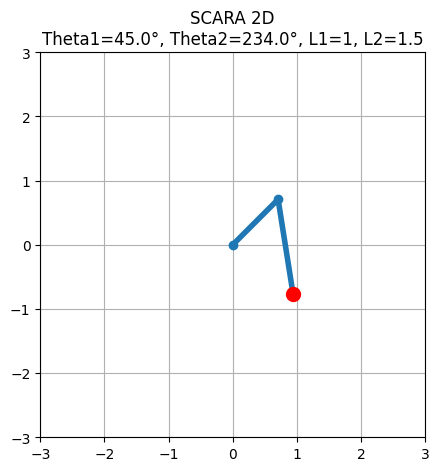

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ==== AQUÍ CAMBIA LOS VALORES ====
theta1 = 45   # grados
theta2 = 234   # grados
L1 = 1        # longitud del primer brazo
L2 = 1.5        # longitud del segundo brazo
# ================================

# Cinemática directa simple
theta1_rad = np.deg2rad(theta1)
theta2_rad = np.deg2rad(theta2)

# Primer punto (articulación 1)
x1 = L1 * np.cos(theta1_rad)
y1 = L1 * np.sin(theta1_rad)

# Segundo punto (efector final)
x2 = x1 + L2 * np.cos(theta1_rad + theta2_rad)
y2 = y1 + L2 * np.sin(theta1_rad + theta2_rad)

# Graficar
plt.figure(figsize=(5,5))
plt.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
plt.plot(x2, y2, 'ro', markersize=10)
plt.xlim(-L1-L2-0.5, L1+L2+0.5)
plt.ylim(-L1-L2-0.5, L1+L2+0.5)
plt.gca().set_aspect('equal')
plt.title(f"SCARA 2D\nTheta1={theta1:.1f}°, Theta2={theta2:.1f}°, L1={L1}, L2={L2}")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def scara_plot(theta1, theta2, L1, L2):
    # Convertir a radianes
    theta1_rad = np.deg2rad(theta1)
    theta2_rad = np.deg2rad(theta2)

    # Cinemática directa
    x1 = L1 * np.cos(theta1_rad)
    y1 = L1 * np.sin(theta1_rad)

    x2 = x1 + L2 * np.cos(theta1_rad + theta2_rad)
    y2 = y1 + L2 * np.sin(theta1_rad + theta2_rad)

    # Graficar
    plt.figure(figsize=(5,5))
    plt.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
    plt.plot(x2, y2, 'ro', markersize=10)
    plt.xlim(-L1-L2-0.5, L1+L2+0.5)
    plt.ylim(-L1-L2-0.5, L1+L2+0.5)
    plt.gca().set_aspect('equal')
    plt.title(f"SCARA 2D\nTheta1={theta1:.1f}°, Theta2={theta2:.1f}°, L1={L1}, L2={L2}")
    plt.grid(True)
    plt.show()

# Crear sliders interactivos
interact(
    scara_plot,
    theta1=widgets.FloatSlider(value=45, min=-180, max=180, step=1, description="Theta1 (°)"),
    theta2=widgets.FloatSlider(value=234, min=-180, max=180, step=1, description="Theta2 (°)"),
    L1=widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description="L1 (m)"),
    L2=widgets.FloatSlider(value=1.5, min=0.1, max=3.0, step=0.1, description="L2 (m)")
)


interactive(children=(FloatSlider(value=45.0, description='Theta1 (°)', max=180.0, min=-180.0, step=1.0), Floa…

<function __main__.scara_plot(theta1, theta2, L1, L2)>

# Encontremos el espacio de trabajo del robot

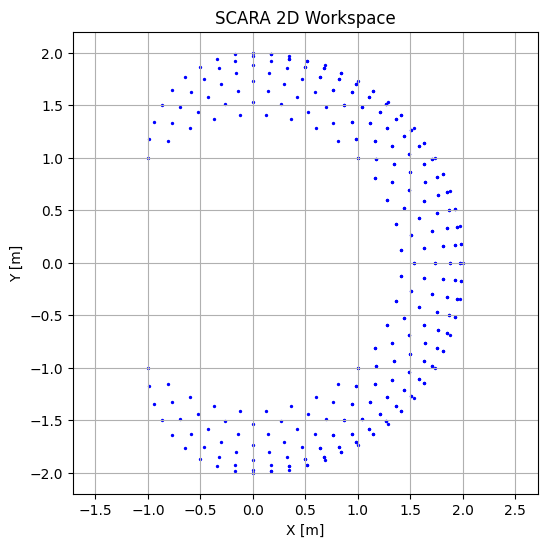

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point
from math import radians as rad

# Variables
theta1, theta2 = dynamicsymbols('theta1 theta2')
L1, L2 = symbols('L1 L2')

# SCARA forward kinematics
def scara2d(tet1_deg, tet2_deg, l1, l2):
    N = ReferenceFrame('N')
    A = N.orientnew('A', 'Axis', [theta1, N.z])
    B = A.orientnew('B', 'Axis', [theta2, A.z])

    O = Point('O')
    P1 = O.locatenew('P1', L1 * A.x)
    P2 = P1.locatenew('P2', L2 * B.x)

    pos_vec = P2.pos_from(O).express(N).simplify()
    
    valores = {
        theta1: rad(tet1_deg),
        theta2: rad(tet2_deg),
        L1: l1,
        L2: l2
    }

    pos_num = pos_vec.subs(valores).evalf()
    return float(pos_num.dot(N.x)), float(pos_num.dot(N.y))

# Generate workspace points
xs, ys = [], []
for t1 in range(-90, 91, 10):
    for t2 in range(-90, 91, 10):
        x, y = scara2d(t1, t2, 1, 1)
        xs.append(x)
        ys.append(y)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(xs, ys, s=2, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("SCARA 2D Workspace")
plt.axis("equal")
plt.grid(True)
plt.show()


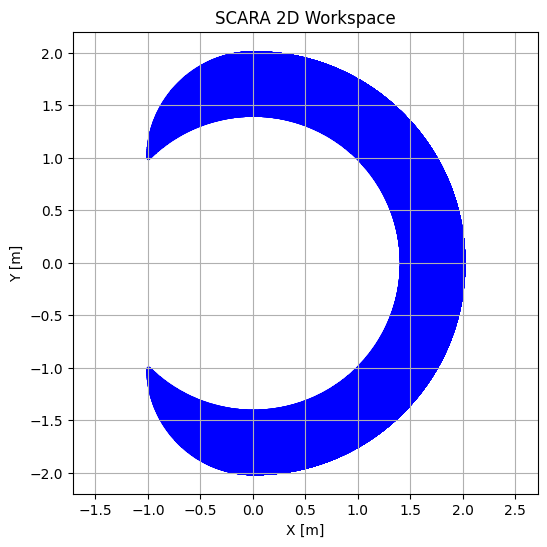

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x0000020DFF30CCC0>
File:            c:\users\aleja\appdata\local\programs\python\python313\lib\site-packages\numpy\_core\function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unle

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, sin, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point
from math import radians as rad

# Define symbols
theta1, theta2 = dynamicsymbols('theta1 theta2')
L1, L2 = symbols('L1 L2')
t = symbols('t', real=True)

# Build symbolic kinematics once
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta1, N.z])
B = A.orientnew('B', 'Axis', [theta2, A.z])

O = Point('O')
P1 = O.locatenew('P1', L1 * A.x)
P2 = P1.locatenew('P2', L2 * B.x)

pos_vec = P2.pos_from(O).express(N)

# Replace symbols with expressions

# Create fast numerical functions
fx = lambdify((theta1,theta2, L1, L2), pos_vec.dot(N.x), "numpy")
fy = lambdify((theta1, theta2, L1, L2), pos_vec.dot(N.y), "numpy")

# Angle sweep (in radians)
theta1_vals = np.radians(np.linspace(-90, 90, 1800))
theta2_vals = np.radians(np.linspace(-90, 90, 1800))

np.linspace?

# Compute workspace
xs, ys = [], []
for t1 in theta1_vals:
    for t2 in theta2_vals:
        xs.append(fx(t1, t2, 1, 1))
        ys.append(fy(t1, t2, 1, 1))

# Plot workspace
plt.figure(figsize=(6,6))
plt.scatter(xs, ys, s=2, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("SCARA 2D Workspace")
plt.axis("equal")
plt.grid(True)
plt.show()


# Ahora con cálculo numérico

# Graficar encuentre la velocidad del robot para una trayectoria conocida

In [ ]:
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2, t = symbols('L1 L2 t') # a1, a2  y tiempo
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta1, N.z])
B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B
P1 = L1 * A.x # Existe un P1 en L1  por A_x
P2 = L2 * B.x # Existe un P2 en L2 con respecto a B_x
P3 = P1+P2
vector_pos_efector = P3.express(N).simplify()

display(vector_pos_efector)

valores = {
    theta1: rad(20)*sin(t),
    theta2: rad(0)*cos(t),
    L1: 1,
    L2: 1
}

display(vector_pos_efector.subs(valores))
    
xs, ys = [], []
for t1 in range(-90, 91, 10):
    for t2 in range(-90, 91, 10):
        x, y = scara2d(t1, t2, 1, 1)
        xs.append(x)
        ys.append(y)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(xs, ys, s=2, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("SCARA 2D Workspace")
plt.axis("equal")
plt.grid(True)
plt.show()

(L₁⋅cos(θ₁) + L₂⋅cos(θ₁ + θ₂)) n_x + (L₁⋅sin(θ₁) + L₂⋅sin(θ₁ + θ₂)) n_y

     ⎛π⋅sin(t)⎞            ⎛π⋅sin(t)⎞    
2⋅cos⎜────────⎟ n_x + 2⋅sin⎜────────⎟ n_y
     ⎝   9    ⎠            ⎝   9    ⎠    

2 n_x

2⋅cos(0.00704710218406272⋅π) n_x + 2⋅sin(0.00704710218406272⋅π) n_y

2⋅cos(0.014065828174861⋅π) n_x + 2⋅sin(0.014065828174861⋅π) n_y

2⋅cos(0.0210279160400456⋅π) n_x + 2⋅sin(0.0210279160400456⋅π) n_y

2⋅cos(0.0279053319090088⋅π) n_x + 2⋅sin(0.0279053319090088⋅π) n_y

2⋅cos(0.0346703828553875⋅π) n_x + 2⋅sin(0.0346703828553875⋅π) n_y

2⋅cos(0.0412958284067031⋅π) n_x + 2⋅sin(0.0412958284067031⋅π) n_y

2⋅cos(0.0477549902321302⋅π) n_x + 2⋅sin(0.0477549902321302⋅π) n_y

2⋅cos(0.0540218595667187⋅π) n_x + 2⋅sin(0.0540218595667187⋅π) n_y

2⋅cos(0.0600712019395108⋅π) n_x + 2⋅sin(0.0600712019395108⋅π) n_y

2⋅cos(0.0658786587838489⋅π) n_x + 2⋅sin(0.0658786587838489⋅π) n_y

2⋅cos(0.0714208455207266⋅π) n_x + 2⋅sin(0.0714208455207266⋅π) n_y

2⋅cos(0.0766754457202347⋅π) n_x + 2⋅sin(0.0766754457202347⋅π) n_y

2⋅cos(0.0816213009619481⋅π) n_x + 2⋅sin(0.0816213009619481⋅π) n_y

2⋅cos(0.0862384960324174⋅π) n_x + 2⋅sin(0.0862384960324174⋅π) n_y

2⋅cos(0.090508439116704⋅π) n_x + 2⋅sin(0.090508439116704⋅π) n_y

2⋅cos(0.0944139366610571⋅π) n_x + 2⋅sin(0.0944139366610571⋅π) n_y

2⋅cos(0.0979392626052869⋅π) n_x + 2⋅sin(0.0979392626052869⋅π) n_y

2⋅cos(0.101070221706058⋅π) n_x + 2⋅sin(0.101070221706058⋅π) n_y

2⋅cos(0.103794206696123⋅π) n_x + 2⋅sin(0.103794206696123⋅π) n_y

2⋅cos(0.106100249049342⋅π) n_x + 2⋅sin(0.106100249049342⋅π) n_y

2⋅cos(0.10797906314706⋅π) n_x + 2⋅sin(0.10797906314706⋅π) n_y

2⋅cos(0.109423083668023⋅π) n_x + 2⋅sin(0.109423083668023⋅π) n_y

2⋅cos(0.11042649605125⋅π) n_x + 2⋅sin(0.11042649605125⋅π) n_y

2⋅cos(0.110985259909223⋅π) n_x + 2⋅sin(0.110985259909223⋅π) n_y

2⋅cos(0.111097125297097⋅π) n_x + 2⋅sin(0.111097125297097⋅π) n_y

2⋅cos(0.110761641772438⋅π) n_x + 2⋅sin(0.110761641772438⋅π) n_y

2⋅cos(0.109980160208993⋅π) n_x + 2⋅sin(0.109980160208993⋅π) n_y

2⋅cos(0.108755827357198⋅π) n_x + 2⋅sin(0.108755827357198⋅π) n_y

2⋅cos(0.107093573173327⋅π) n_x + 2⋅sin(0.107093573173327⋅π) n_y

2⋅cos(0.105000090968296⋅π) n_x + 2⋅sin(0.105000090968296⋅π) n_y

2⋅cos(0.102483810456065⋅π) n_x + 2⋅sin(0.102483810456065⋅π) n_y

2⋅cos(0.0995548638101484⋅π) n_x + 2⋅sin(0.0995548638101484⋅π) n_y

2⋅cos(0.0962250448649376⋅π) n_x + 2⋅sin(0.0962250448649376⋅π) n_y

2⋅cos(0.0925077616260857⋅π) n_x + 2⋅sin(0.0925077616260857⋅π) n_y

2⋅cos(0.0884179822812036⋅π) n_x + 2⋅sin(0.0884179822812036⋅π) n_y

2⋅cos(0.0839721749282509⋅π) n_x + 2⋅sin(0.0839721749282509⋅π) n_y

2⋅cos(0.0791882412643181⋅π) n_x + 2⋅sin(0.0791882412643181⋅π) n_y

2⋅cos(0.0740854445018102⋅π) n_x + 2⋅sin(0.0740854445018102⋅π) n_y

2⋅cos(0.0686843318022895⋅π) n_x + 2⋅sin(0.0686843318022895⋅π) n_y

2⋅cos(0.0630066515403079⋅π) n_x + 2⋅sin(0.0630066515403079⋅π) n_y

2⋅cos(0.0570752657303785⋅π) n_x + 2⋅sin(0.0570752657303785⋅π) n_y

2⋅cos(0.0509140579697123⋅π) n_x + 2⋅sin(0.0509140579697123⋅π) n_y

2⋅cos(0.0445478372674015⋅π) n_x + 2⋅sin(0.0445478372674015⋅π) n_y

2⋅cos(0.0380022381472965⋅π) n_x + 2⋅sin(0.0380022381472965⋅π) n_y

2⋅cos(0.0313036174268255⋅π) n_x + 2⋅sin(0.0313036174268255⋅π) n_y

2⋅cos(0.0244789480873934⋅π) n_x + 2⋅sin(0.0244789480873934⋅π) n_y

2⋅cos(0.0175557106637055⋅π) n_x + 2⋅sin(0.0175557106637055⋅π) n_y

2⋅cos(0.0105617825893536⋅π) n_x + 2⋅sin(0.0105617825893536⋅π) n_y

2⋅cos(0.00352532594422974⋅π) n_x + 2⋅sin(0.00352532594422974⋅π) n_y

2⋅cos(0.00352532594422976⋅π) n_x + -2⋅sin(0.00352532594422976⋅π) n_y

2⋅cos(0.0105617825893536⋅π) n_x + -2⋅sin(0.0105617825893536⋅π) n_y

2⋅cos(0.0175557106637056⋅π) n_x + -2⋅sin(0.0175557106637056⋅π) n_y

2⋅cos(0.0244789480873934⋅π) n_x + -2⋅sin(0.0244789480873934⋅π) n_y

2⋅cos(0.0313036174268255⋅π) n_x + -2⋅sin(0.0313036174268255⋅π) n_y

2⋅cos(0.0380022381472965⋅π) n_x + -2⋅sin(0.0380022381472965⋅π) n_y

2⋅cos(0.0445478372674015⋅π) n_x + -2⋅sin(0.0445478372674015⋅π) n_y

2⋅cos(0.0509140579697123⋅π) n_x + -2⋅sin(0.0509140579697123⋅π) n_y

2⋅cos(0.0570752657303785⋅π) n_x + -2⋅sin(0.0570752657303785⋅π) n_y

2⋅cos(0.0630066515403079⋅π) n_x + -2⋅sin(0.0630066515403079⋅π) n_y

2⋅cos(0.0686843318022895⋅π) n_x + -2⋅sin(0.0686843318022895⋅π) n_y

2⋅cos(0.0740854445018102⋅π) n_x + -2⋅sin(0.0740854445018102⋅π) n_y

2⋅cos(0.0791882412643181⋅π) n_x + -2⋅sin(0.0791882412643181⋅π) n_y

2⋅cos(0.0839721749282509⋅π) n_x + -2⋅sin(0.0839721749282509⋅π) n_y

2⋅cos(0.0884179822812036⋅π) n_x + -2⋅sin(0.0884179822812036⋅π) n_y

2⋅cos(0.0925077616260857⋅π) n_x + -2⋅sin(0.0925077616260857⋅π) n_y

2⋅cos(0.0962250448649376⋅π) n_x + -2⋅sin(0.0962250448649376⋅π) n_y

2⋅cos(0.0995548638101484⋅π) n_x + -2⋅sin(0.0995548638101484⋅π) n_y

2⋅cos(0.102483810456065⋅π) n_x + -2⋅sin(0.102483810456065⋅π) n_y

2⋅cos(0.105000090968296⋅π) n_x + -2⋅sin(0.105000090968296⋅π) n_y

2⋅cos(0.107093573173327⋅π) n_x + -2⋅sin(0.107093573173327⋅π) n_y

2⋅cos(0.108755827357198⋅π) n_x + -2⋅sin(0.108755827357198⋅π) n_y

2⋅cos(0.109980160208993⋅π) n_x + -2⋅sin(0.109980160208993⋅π) n_y

2⋅cos(0.110761641772438⋅π) n_x + -2⋅sin(0.110761641772438⋅π) n_y

2⋅cos(0.111097125297097⋅π) n_x + -2⋅sin(0.111097125297097⋅π) n_y

2⋅cos(0.110985259909223⋅π) n_x + -2⋅sin(0.110985259909223⋅π) n_y

2⋅cos(0.11042649605125⋅π) n_x + -2⋅sin(0.11042649605125⋅π) n_y

2⋅cos(0.109423083668023⋅π) n_x + -2⋅sin(0.109423083668023⋅π) n_y

2⋅cos(0.10797906314706⋅π) n_x + -2⋅sin(0.10797906314706⋅π) n_y

2⋅cos(0.106100249049342⋅π) n_x + -2⋅sin(0.106100249049342⋅π) n_y

2⋅cos(0.103794206696123⋅π) n_x + -2⋅sin(0.103794206696123⋅π) n_y

2⋅cos(0.101070221706058⋅π) n_x + -2⋅sin(0.101070221706058⋅π) n_y

2⋅cos(0.0979392626052869⋅π) n_x + -2⋅sin(0.0979392626052869⋅π) n_y

2⋅cos(0.0944139366610571⋅π) n_x + -2⋅sin(0.0944139366610571⋅π) n_y

2⋅cos(0.090508439116704⋅π) n_x + -2⋅sin(0.090508439116704⋅π) n_y

2⋅cos(0.0862384960324174⋅π) n_x + -2⋅sin(0.0862384960324174⋅π) n_y

2⋅cos(0.0816213009619481⋅π) n_x + -2⋅sin(0.0816213009619481⋅π) n_y

2⋅cos(0.0766754457202347⋅π) n_x + -2⋅sin(0.0766754457202347⋅π) n_y

2⋅cos(0.0714208455207266⋅π) n_x + -2⋅sin(0.0714208455207266⋅π) n_y

2⋅cos(0.0658786587838489⋅π) n_x + -2⋅sin(0.0658786587838489⋅π) n_y

2⋅cos(0.0600712019395108⋅π) n_x + -2⋅sin(0.0600712019395108⋅π) n_y

2⋅cos(0.0540218595667188⋅π) n_x + -2⋅sin(0.0540218595667188⋅π) n_y

2⋅cos(0.0477549902321302⋅π) n_x + -2⋅sin(0.0477549902321302⋅π) n_y

2⋅cos(0.041295828406703⋅π) n_x + -2⋅sin(0.041295828406703⋅π) n_y

2⋅cos(0.0346703828553874⋅π) n_x + -2⋅sin(0.0346703828553874⋅π) n_y

2⋅cos(0.0279053319090088⋅π) n_x + -2⋅sin(0.0279053319090088⋅π) n_y

2⋅cos(0.0210279160400455⋅π) n_x + -2⋅sin(0.0210279160400455⋅π) n_y

2⋅cos(0.014065828174861⋅π) n_x + -2⋅sin(0.014065828174861⋅π) n_y

2⋅cos(0.00704710218406272⋅π) n_x + -2⋅sin(0.00704710218406272⋅π) n_y

2⋅cos(2.72143733143856e-17⋅π) n_x + -2⋅sin(2.72143733143856e-17⋅π) n_y

# Ejemplo en clase

In [ ]:
x, y, theta, r= dynamicsymbols("x y theta r")
t = symbols("t")
N = ReferenceFrame("N")
r1 = 1*N.x + 2*N.y
r2 = 3*N.x + 5*N.y

r1.dot(r2)

# ------------
# N.orientnew?

# A es el marco que vamos a rotar
# A es el nombre del nuevo marco
# Luego va el tipo de rotación
# Y finalmente los ángulos y el eje respecto al que rota

A = N.orientnew('A', 'Axis', [theta, N.z])

P1 = x*N.x + y*N.y
P2 = r*A.x

P2 = P2.express(N)

a = P2.diff(t, N).diff(t,N).express(A).simplify()

# Sustituyendo la aceleración angular por cero
a.subs({theta.diff(t).diff(t) : 0})

a

⎛     2    ⎞                        
⎝- r⋅θ̇  + r̈⎠ a_x + (r⋅θ̈ + 2⋅ṙ⋅θ̇) a_y

In [ ]:
# Matriz de cosenos y vectores
A.dcm(N)

⎡cos(θ)   sin(θ)  0⎤
⎢                  ⎥
⎢-sin(θ)  cos(θ)  0⎥
⎢                  ⎥
⎣   0       0     1⎦